In [1]:
# For handling and processing tabular data efficiently
import pandas as pd 

In [2]:
# To perform an independent t-test to compare gene expression between control and treated samples
from scipy.stats import ttest_ind

In [3]:
# Load the gene expression data
# Read the gene expression matrix from TSV file
df = pd.read_csv('gene_expression_data.txt', sep='\t')

In [4]:
# Set the gene identifiers as the index for easy lookup and analysis
df.set_index('ID_REF', inplace=True)

In [5]:
# Dataset contains expression values for multiple samples
# This step tries to categorize samples into control (uninfected) and treated (Influenza A-infected) groups by searching for keywords in column names
# Define sample groups based on the dataset's sample information
control_samples = [col for col in df.columns if 'control' in col.lower()]
treated_samples = [col for col in df.columns if 'influenza' in col.lower()]

In [140]:
# Ensure there are samples in both groups
if not control_samples or not treated_samples:
    raise ValueError("Sample groups could not be determined. Please verify sample labels.")

ValueError: Sample groups could not be determined. Please verify sample labels.

In [141]:
print(df.columns)

Index(['GSM1684095', 'GSM1684096', 'GSM1684097', 'GSM1684098', 'GSM1684099',
       'GSM1684100', 'GSM1684101', 'GSM1684102', 'GSM1684103', 'GSM1684104'],
      dtype='object')


In [ ]:
# Extract sample names and their corresponding conditions from the metadata file
# Extract and Map Control vs. Treated Samples

In [7]:
# Loading metadata and extracting sample groups

# Read metadata file
metadata_file = "GSE68849_series_matrix.txt"

In [8]:
# Extract sample titles and characteristics
# "!Sample_title": contains sample names
# "!Sample_characteristics_ch1": Contains treatment details

sample_titles = []
sample_characteristics = []

with open(metadata_file, "r") as f:
    for line in f:
        if line.startswith("!Sample_title"):
            sample_titles = line.strip().split("\t")[1:] # ignore first column
        if line.startswith("!Sample_characteristics_ch1") and "agent:" in line:
            sample_characteristics = line.strip().split("\t")[1:] # ignore fiirst column


In [9]:
# Creating a dictionary that maps each sample to either control or treated based on its metadata description

sample_mapping = {}

for title, characteristic in zip(sample_titles, sample_characteristics):
    if "No virus control" in characteristic:
        sample_mapping[title] = "control"
    elif "Influenza A" in characteristic:
        sample_mapping[title] = "treated"



In [10]:
# Retrieves the correct sample IDs for both groups based on the mapping
control_samples = [sample for sample, label in sample_mapping.items() if label == "control"]
treated_samples = [sample for sample, label in sample_mapping.items() if label == "treated"]

In [11]:
print("Control Samples:", control_samples)
print("Treated Samples:", treated_samples)

Control Samples: ['"Donor 1 - No virus control   - 8h"', '"Donor 2 - No virus control   - 8h"', '"Donor 3 - No virus control   - 8h"', '"Donor 4 - No virus control   - 8h"', '"Donor 5 - No virus control   - 8h"']
Treated Samples: ['"Donor 1 - Influenza treated - 8h"', '"Donor 2 - Influenza treated - 8h"', '"Donor 3 - Influenza treated - 8h"', '"Donor 4 - Influenza treated - 8h"', '"Donor 5 - Influenza treated - 8h"']


In [148]:
# whats done?
# Extract sample names from !Sample_title
# Find matching treatment types from !Sample_characteristics_ch1
# Map each sample as either "control" or "treated"

In [12]:
print("Columns in Data:", df.columns.tolist())

Columns in Data: ['GSM1684095', 'GSM1684096', 'GSM1684097', 'GSM1684098', 'GSM1684099', 'GSM1684100', 'GSM1684101', 'GSM1684102', 'GSM1684103', 'GSM1684104']


In [151]:
# The previous script wrongly assumed that control and treated sample could be inferred from column names.
# Now we explicitly retrieve sample IDs from metadat

# Extract sample identifiers: instead of using !Sample_title, extract the actual sample identifiers
# Run this in bash to check if sample ids are present
# grep '!Sample_geo_accession' GSE68849_series_matrix.txt

In [16]:
# they are present. now modify the sample mapping to use these GSM IDs

# extract GSM identifiers
sample_ids = []
with open(metadata_file, "r") as f:
    for line in f:
        if line.startswith("!Sample_geo_accession"):
            sample_ids = line.strip().split("\t")[1:]  # Ignore the first column


In [17]:
# update sample mapping to use GSM IDs
sample_mapping = dict(zip(sample_titles, sample_ids)) # map long names to GSM IDs

In [18]:
# Extract correct GSM IDs
control_samples = [sample_mapping[title] for title in sample_titles if "No virus control" in title]
treated_samples = [sample_mapping[title] for title in sample_titles if "Influenza treated" in title]


In [19]:
print("Mapped Control Samples:", control_samples)
print("Mapped Treated Samples:", treated_samples)


Mapped Control Samples: ['"GSM1684095"', '"GSM1684097"', '"GSM1684099"', '"GSM1684101"', '"GSM1684103"']
Mapped Treated Samples: ['"GSM1684096"', '"GSM1684098"', '"GSM1684100"', '"GSM1684102"', '"GSM1684104"']


In [20]:
(print(df.columns))

Index(['GSM1684095', 'GSM1684096', 'GSM1684097', 'GSM1684098', 'GSM1684099',
       'GSM1684100', 'GSM1684101', 'GSM1684102', 'GSM1684103', 'GSM1684104'],
      dtype='object')


In [21]:
# Ensure there are samples in both groups
if not control_samples or not treated_samples:
    raise ValueError("Sample groups could not be determined. Please verify sample labels.")

In [22]:
# Checking and verifying
print("Column name in dataframe:", df.columns.tolist())

Column name in dataframe: ['GSM1684095', 'GSM1684096', 'GSM1684097', 'GSM1684098', 'GSM1684099', 'GSM1684100', 'GSM1684101', 'GSM1684102', 'GSM1684103', 'GSM1684104']


In [23]:
# print extracted sample names
print("Control samples:", control_samples)
print("Treated samples:", treated_samples)

Control samples: ['"GSM1684095"', '"GSM1684097"', '"GSM1684099"', '"GSM1684101"', '"GSM1684103"']
Treated samples: ['"GSM1684096"', '"GSM1684098"', '"GSM1684100"', '"GSM1684102"', '"GSM1684104"']


In [24]:
# The GSM IDs in sample names have double quotes that must be cleaned
# Remove extra quotes from sample names
control_samples = [sample.strip('"') for sample in control_samples]
treated_samples = [sample.strip('"') for sample in treated_samples]

In [26]:
# The dataset may contain extra samples
# This ensures that only control and treated samples are included in further analysis
df = df[control_samples + treated_samples] # cleaned

In [29]:
# Performing Differential gene expression analysis:
# t-test is applied to each gene separately
# It checks if a gene's expression is significantly different between the control and treated groups
# "equal_var=False" ensures that the test accounts for unequal variance between groups

# Correcting for Multiple Testing (Benjamini-Hochberg):
# Why is it important?
# Testing thousands of genes sometimes give false significance by chance
# Benjamini-Hochberg correction adjusts p-values to control the false discovery rate (FDR)

# Filtering significant genes:
# Selecting genes with an adjusted p-value < 0.05, meaning they show statistically significant changes between control and treated conditions
# Save results to a CSV file


In [30]:
# Perform differential expression analysis
results = []
for gene in df.index:
    control_values = df.loc[gene, control_samples].astype(float)
    treated_values = df.loc[gene, treated_samples].astype(float)

    # Perform an independent t-test
    t_stat, p_value = ttest_ind(control_values, treated_values, equal_var=False)
    results.append((gene, t_stat, p_value))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Gene', 'T-statistic', 'P-value'])

# Apply Benjamini-Hochberg multiple testing correction
results_df['Adjusted P-value'] = results_df['P-value'] * len(results_df) / (results_df['P-value'].rank())

# Filter for significantly differentially expressed genes (p < 0.05)
significant_genes = results_df[results_df['Adjusted P-value'] < 0.05]

# Save results
significant_genes.to_csv('differentially_expressed_genes.csv', index=False)

print(f"Identified {len(significant_genes)} significantly differentially expressed genes.")

Identified 12 significantly differentially expressed genes.


In [31]:
print(significant_genes)

               Gene  T-statistic       P-value  Adjusted P-value
2914   ILMN_1664012   -11.190891  3.683407e-06          0.029051
3818   ILMN_1668442   -11.539658  9.096122e-06          0.039132
7756   ILMN_1687857    14.017471  7.792061e-07          0.018437
13293  ILMN_1718297    14.045268  1.124800e-06          0.013307
16727  ILMN_1739428   -17.334767  7.136336e-07          0.033771
18847  ILMN_1752728    11.059220  4.181660e-06          0.028269
23881  ILMN_1784661   -11.469892  8.401116e-06          0.039756
26609  ILMN_1802411   -11.568533  1.226414e-05          0.048364
32623  ILMN_2064606    12.517869  1.620358e-06          0.015336
34241  ILMN_2156267    11.096660  4.780365e-06          0.028277
34386  ILMN_2164978    13.625021  8.142383e-07          0.012844
42180  ILMN_3238623    10.894796  4.826591e-06          0.025378


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
# Compute log2 fold change
df['Log2FC'] = np.log2(df[treated_samples].mean(axis=1) + 1) - np.log2(df[control_samples].mean(axis=1) + 1)

In [34]:
# Merge Log2FC with results
results_df = results_df.merge(df[['Log2FC']], left_on='Gene', right_index=True)

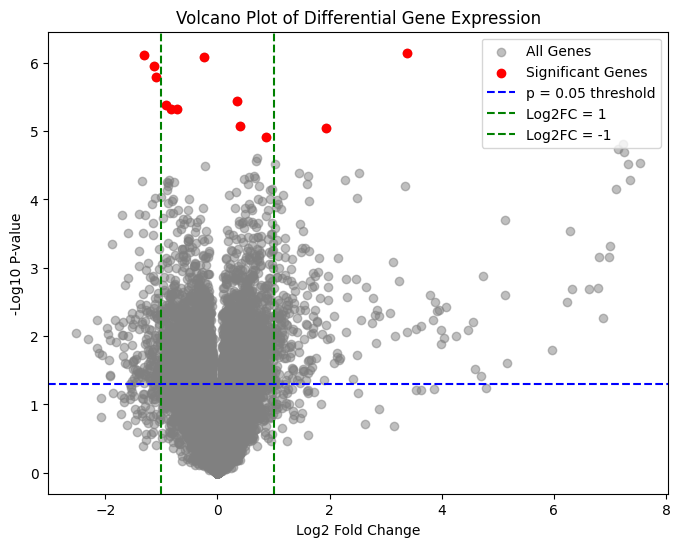

In [47]:
# Create a volcano plot
plt.figure(figsize=(8,6))
plt.scatter(results_df['Log2FC'], -np.log10(results_df['P-value']), color='gray', alpha=0.5, label='All Genes')

# Highlight significant genes
significant = results_df['Adjusted P-value'] < 0.05
plt.scatter(results_df[significant]['Log2FC'], -np.log10(results_df[significant]['P-value']),
            color='red', label='Significant Genes')

# Draw threshold lines
plt.axhline(-np.log10(0.05), linestyle='dashed', color='blue', label='p = 0.05 threshold')
plt.axvline(1, linestyle='dashed', color='green', label='Log2FC = 1')
plt.axvline(-1, linestyle='dashed', color='green', label='Log2FC = -1')

# Labels and title
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10 P-value")
plt.title("Volcano Plot of Differential Gene Expression")
plt.legend()

# Save the figure
plt.savefig("volcano_plot.jpg", dpi=300, bbox_inches='tight')  # Change 'jpg' to 'png' if needed

plt.show()

In [48]:
# Generating a Heatmap of Differentially Expressed genes

import seaborn as sns

In [49]:
# Select top differentially expressed genes (sorted by adjusted p-value)
top_genes = significant_genes.sort_values('Adjusted P-value').head(20)['Gene']

In [50]:
# Extract expression values for these genes
heatmap_data = df.loc[top_genes, control_samples + treated_samples]

In [51]:
# Normalize data
heatmap_data = (heatmap_data - heatmap_data.mean(axis=1).values.reshape(-1, 1)) / heatmap_data.std(axis=1).values.reshape(-1, 1)


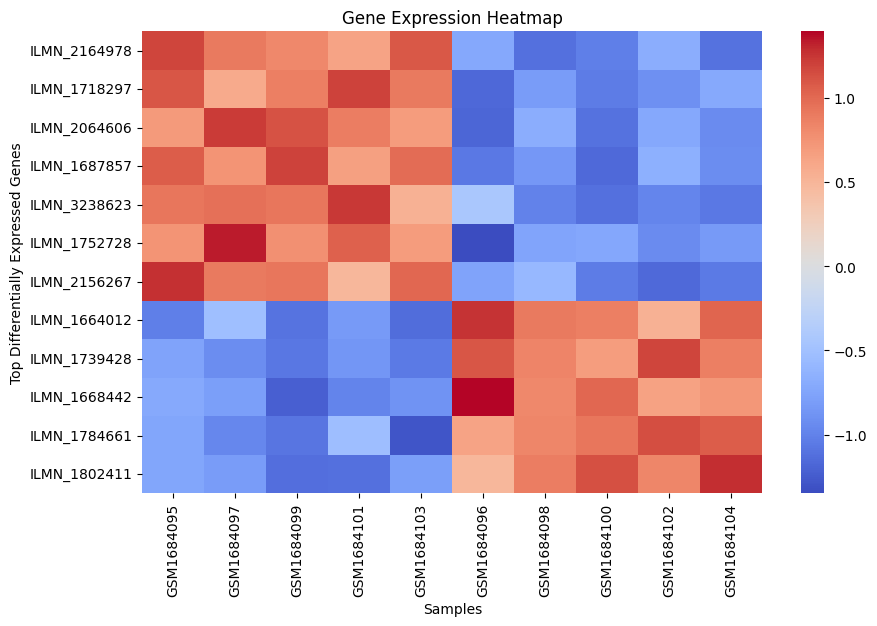

In [53]:
# Create heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap='coolwarm', xticklabels=True, yticklabels=True)
plt.xlabel("Samples")
plt.ylabel("Top Differentially Expressed Genes")
plt.title("Gene Expression Heatmap")

# Save the heatmap before displaying it
plt.savefig("gene_expression_heatmap.jpg", dpi=300, bbox_inches='tight')  

plt.show()

In [54]:
# Using g:Profiler to see which biological pathways are enriched in our DEGs.

# Identifies biological pathways that are enriched in the set of significant DEGs
# Helps in functional interpretation of gene expression changes

In [55]:
from gprofiler import GProfiler

In [56]:
# Initialize gProfiler
gp = GProfiler(return_dataframe=True)

In [57]:
# Perform enrichment analysis
enriched = gp.profile(organism='hsapiens', query=list(significant_genes['Gene']))


In [58]:
# Save results
enriched.to_csv('enriched_pathways.csv', index=False)

print("Enrichment analysis completed. Results saved in 'enriched_pathways.csv'.")

Enrichment analysis completed. Results saved in 'enriched_pathways.csv'.
